# Homework 3

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion materials are also allowed.

# Exercises
## Exercise 1 - Agglomerative Clustering (40 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (20 points)

 - Explain why you would pick these parameters. 
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be? 
 
Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('./bitstrings.csv')

#I will use single-linkage.
#The distance threshold would be 1 because the bitstrings are considered part of the same equivalence class if they are 1 transformation apart.
#We want to check that at least one point in each cluster satisfies this constraint to be considered an equivalence class. (The equivalence is transitive)

#I will use Manhattan distance.
# Euclidian distance would not work in this case because we cannot measure a change in x and y to get the distance like we would to get the distance between two points on a graph. 
# Manhattan distance allows us to measure the distance based on the number of transformations it takes to get from one bitstring to another.

#The threshold distance should be 1.1. If the distance is less than 1.1 bitstring transformations, then the clusters should be merged together. 

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints: 
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

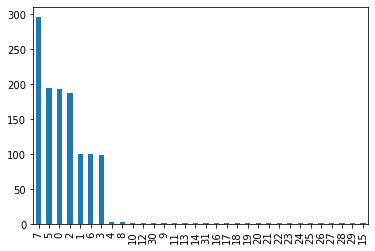

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#do I need to do any preprocessing of the data? 

#Perform agglomerative clustering:
clustering = AgglomerativeClustering(n_clusters = None, linkage="single", affinity = 'manhattan', distance_threshold= 1.1)
agg_result = clustering.fit(df) 
clustering = pd.Series(agg_result.labels_, name='class')
distribution = clustering.value_counts()
#print(distribution)
#print(df.head())

_ = distribution.plot(kind='bar') #show the frequency of each cluster

## Exercise 2 - K-Means Clustering (30 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (20 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

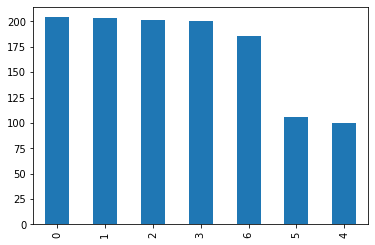

In [9]:
#From the bar chart in 1.2, we can see that there are 7 clusters. 

from sklearn.cluster import KMeans
k = 7 

k_clustering = KMeans(n_clusters=k)

agg_result = k_clustering.fit(df) 
clustering = pd.Series(agg_result.labels_, name='class')
distribution = clustering.value_counts()
#print(distribution)

_ = distribution.plot(kind='bar') #show the frequency of each cluster

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

In [ ]:
# The results from 1.2 show 7 major clusters, and then multiple very small clusters containing just one or two datapoints.
#This is because in agglomerative clustering, we use a rule (threshold distance) to dictate when we merge clusters together. 
#This means if we have two data points that are two transformations apart, they will never be part of the same cluster because our distance is 1.1.
# We start by treating each data point as its own cluster and then merge them together to form large clusters.
# Single linkage measures distance as the minimum distance between two data points from each cluster.

# The results from 2.1 show 7 more evenly distributed clusters (the sizes are more consistent). There are no insignificantly small clusters.
# This is because k means clustering doesn't use a rule to form clusters, instead it just uses the number of clusters its given to group the data.
# This means if we have two data points that are two transformations apart, they could be part of the same cluster.


## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

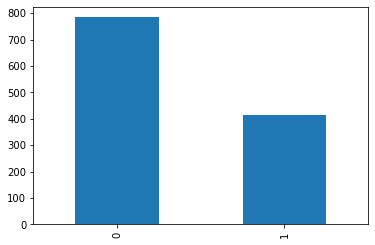

In [10]:
#From the bar chart in 1.2, we can see that there are 7 clusters. 

from sklearn.cluster import KMeans
k = 2 #form 2 clusters

k_clustering = KMeans(n_clusters=k)

agg_result = k_clustering.fit(df) 
clustering = pd.Series(agg_result.labels_, name='class')
distribution = clustering.value_counts()
#print(distribution)

_ = distribution.plot(kind='bar') #show the frequency of each cluster

### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the highest weight in the first principal component.

[ 0.3089109  -0.29251836 -0.13561685  0.0108789  -0.00588144 -0.23730068
 -0.40526937 -0.40427021  0.35156104  0.27151495 -0.12018054 -0.03616206
 -0.23180975 -0.01976983 -0.01448354  0.38609576]


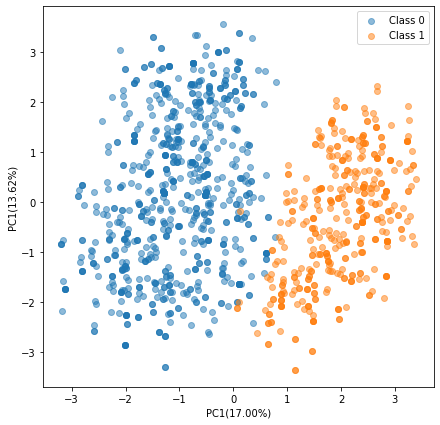

In [19]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = preprocessing.StandardScaler()
pca = PCA(n_components=2)

X = scaler.fit_transform(df)
pca.fit(X)

X_pca = pca.transform(X) # Get the projected points

PC1, PC2 = pca.components_ #does this get the eigenvalues/weights?
PC1_var, PC2_var = pca.explained_variance_ratio_ # Computed from the eigenvalues
print(PC1) #print weights of PC1 components

colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(7,7))
for c in clustering.unique(): #replaced "classes.unique with name of kmeans model"
    plt.scatter(X_pca[(clustering == c), 0], X_pca[(clustering == c), 1], c=colors[c], alpha=0.5, label=f'Class {c}')
plt.legend()
plt.xlabel("PC1({:.2%})".format(PC1_var))
plt.ylabel("PC1({:.2%})".format(PC2_var))

plt.show()




